# Data Analysis using `pandas`


```{admonition} Topics

- `Pandas` คืออะไร?
- โครงข้อมูลของ `Pandas`
- การนำเข้าข้อมูล (Data importing)
- การทำความสะอาดข้อมูล (Data cleaning)
- การแปลงข้อมูล (Data transformation)
- การนำออกข้อมูล (Data exporting)
- การนำเสนอข้อมูลเชิงภาพ (Data visualization)
```

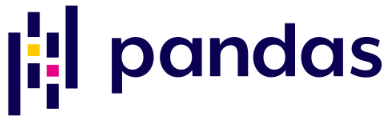

**`Pandas` คืออะไร?

- แพ็กเกจยอดนิยมสำหรับการจัดการและวิเคราะห์ข้อมูลขนาดใหญ่
- พัฒนาต่อยอดมาจาก **`NumPy`** จึงมีฟังก์ชันต่าง ๆ ให้เรียกใช้ได้คล้ายกับ `NumPy`
- เป็นเครื่องมือสำหรับ**การรวบรวมข้อมูล** (data aggregation) **การทำความสะอาดข้อมูล** (data cleaning) และ**การวิเคราะห์ข้อมูล** (data analysis)
- สามารถอ่านและเขียนไฟล์ข้อมูลได้หลากหลายชนิด

**ประโยชน์ของ `Pandas`**

เราสามารถใช้ `Pandas` สำหรับการทำงานตาม data analysis workflow ได้แก่

- **การนำเข้าข้อมูล (import)** จาก database, spreadsheet, CSV file และอื่น ๆ
- **การทำความสะอาดข้อมูล (cleaning)** เช่น การจัดการข้อมูลที่ขาดหาย (missing data)
- **การปรับโครงสร้างข้อมูล (transformation)** ให้เหมาะกับการวิเคราะห์ข้อมูล
- **การรวบรวมข้อมูล (aggregation)** โดยการสรุปข้อมูลเชิงสถิติ หรือการแสดงความสัมพันธ์ระหว่างข้อมูล
- **การนำเสนอข้อมูลเชิงภาพ (visualization)** และการค้นหาข้อมูลเชิงลึก (insight)


ก่อนเริ่มใช้งาน `Pandas` ต้องเริ่มด้วยการ import แพ็กเกจนี้ก่อนโดยใช้คำสั่งต่อไปนี้

In [ ]:

import pandas as pd
print(pd.__version__)

**โครงสร้างในการจัดเก็บข้อมูลของ Pandas**

โครงสร้างพื้นฐานด้านข้อมูล (data structure) พื้นฐานของ `Pandas` ได้แก่ `Series` และ `DataFrame`

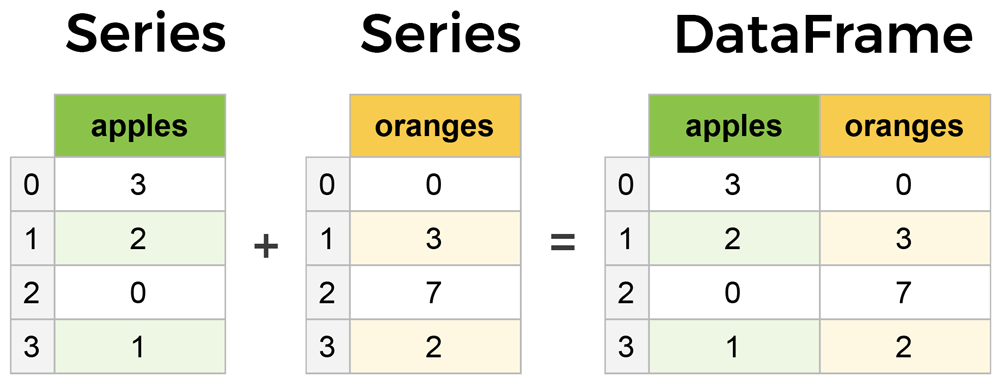


## Series

- `Series` คือ ข้อมูลในรูปแบบของ 1D-array ที่คล้ายกับการใช้งาน `NumPy array` ซึ่งสามารถจัดเก็บข้อมูลได้หลายชนิด ได้แก่ `string`, `int`, `float`, ...
- `Series` ใช้เก็บข้อมูล **คอลัมน์ (column)** หรือ **แถว (row)** ของข้อมูลในตาราง
- `Series` สร้างได้จากข้อมูลที่เป็น `NumPy Array`, `dictionary`


**การสร้าง `Series`**

จะใช้คำสั่งในรูปแบบต่อไปนี้

```python
series_var = pd.Series(data, index=[...], dtype='...', name='...')
```
- **`data`** : ข้อมูลที่จะใช้สร้าง `Series` เช่น `List`, `NumPy array`
- **`index`** : รายการของข้อมูลที่จะใช้เป็น `index` ให้กับข้อมูลใน `Series`
 - ถ้าไม่กำหนด `Pandas` จะใช้ค่าเป็นรายการตัวเลข `0,1,2,...`
- **`dtype`** : ชนิดของข้อมูล เช่น `string`,`int32`,`float32`,`bool`, ...
 - ถ้าไม่กำหนด `Pandas` จะเลือกให้เอง
- **`name`** : ชื่ออ้างอิงสำหรับ `Series` (ชื่อคอลัมน์)


**ตัวอย่าง**

In [ ]:
import numpy as np

# สร้าง Series จาก Numpy Array (1D)
# ไม่กำหนด index, ไม่กำหนดชื่อ
s1 = pd.Series( np.arange(0,5.5,0.5) )
print(s1)
print(s1.size)    # จำนวนข้อมูล
print(s1.shape)   # ขนาดในแต่ละมิติ

In [ ]:
# สร้าง Series จาก Numpy Array - ซุ่มข้อมูลขึ้นมา 5 จำนวน
# มีการกำหนดค่า index สำหรับอ้างอิงข้อมูลใน Series
# ไม่กำหนดชื่อ
s2 = pd.Series( np.random.randn(5), index=["a", "b", "c", "d", "e", ])
print(s2)
print(s2.size)
print(s2.shape)

เราสามารถกำหนด**ชื่อ**ให้กับ `Series` ด้วยการกำหนดค่าให้กับ `name` option

In [ ]:
# Dictionary (1D)
d = {"a": 0.0, "b": 1.0, "c": 2.0}

# สร้าง Series จาก dictionary
# key ใน dictionary จะกลายเป็น index ของ series
# กำหนดชื่อให้กับ Series
s3 = pd.Series(d, name="values")
print(s3)
print()

# สร้าง Series จาก dictionary
# กำหนดค่า index สำหรับข้อมูล
# กำหนดชื่อให้กับ Series
s4 = pd.Series(d, index=["b","c","d","a","e"], name="stars")
print(s4)

`NaN` (not a number) คือ `marker` ที่ `pandas` ใช้แสดงว่าข้อมูลสูญหาย (missing data)


**การเลือกข้อมูลใน `Series`**

เราสามารถเลือกข้อมูลภายใน `Series` โดยการใช้ `index`, `slice` หรือการใช้ `เงื่อนไข (condition)` ได้เหมือนกับที่ใช้ใน `Numpy array`

**ตัวอย่าง**

In [ ]:
print(s4); print()
print(s4[1]); print()                  # index
print(s4[[4,3,1]]); print()            # list of index
print(s4[:3]); print()                 # slice [0,1,2]
print(s4[s4 > s4.median()])            # condition

ในกรณีที่มีการกำหนดค่า `index` ในรูปแบบ**ข้อความ (string)** ให้กับ `Series` เราสามารถใช้ข้อความดังกล่าวอ้างอิงแทนค่า `index` ที่เป็นตัวเลขจำนวนเต็มได้

**ตัวอย่าง**

In [ ]:
print(s4)
print()

s4["e"] = s4["b"]+s4["c"]     # s4["e"] และ s4[4] คือข้อมูล item เดียวกัน
s4["d"] = 10.0
print(s4)

**การคำนวณทางคณิตศาตร์กับ `Series`**

เราสามารถใช้ประยุกต์ใช้หลักการคำนวณ และฟังก์ชันทางคณิตศาสตร์ของ `NumPy` กับ `Series` ได้เช่นเดียวกัน

**ตัวอย่าง**

In [ ]:
# f(x) = e^x
print(np.exp(s4))

In [ ]:
# f(x) = 3x^2
s5 = 3*s4**2
print(s5)

## DataFrame


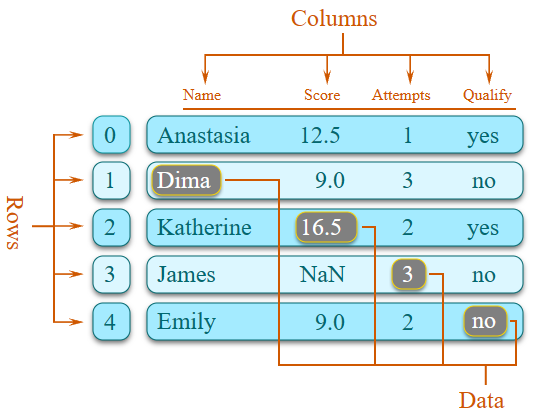


- `DataFrame` คือ 2D-array หรือ `ตาราง (table)` ที่ประกอบไปด้วยหนึ่งหรือหลายคอลัมน์
- ข้อมูลแต่ละคอลัมน์อาจมีชนิดข้อมูล (data type) แตกต่างกัน
- ข้อมูลในแต่ละคอลัมน์ของ `DataFrame` ก็คือ `Series` นั่นเอง
- เราสามารถสร้าง `DataFrame` เองได้จากข้อมูลหลายลักษณะ

 - `Series`
 - `Dictionary` ของหลาย ๆ `List`
 - `Dictionary` ของหลาย ๆ `Series`
 - `NumPy array` (`numpy.ndarray`)
 - ...

- ใช้ `.shape` ในการตรวจสอบขนาดของ `DataFrame`
- ใช้ `.dtypes` ในการตรวจสอบชนิดของข้อมูลในแต่ละคอลัมน์


### การสร้าง `DataFrame`

จะใช้คำสั่ง `pd.DataFrame()` ในรูปแบบต่อไปนี้

```python
dataframe_var = pd.DataFrame(data, index=[...], columns=[...], dtype=...)
```

- **`data`** : ข้อมูลที่จะใช้สร้าง `DataFrame` เช่น `Series`, `Dictionary`, `NumPy array`
- **`index`** : รายการของข้อมูลที่จะใช้เป็น `index` เพื่ออ้างอิงแถว (row) ให้กับข้อมูลใน `DataFrame`
 - ถ้าไม่กำหนด `Pandas` จะใช้ค่าเป็นรายการตัวเลข `0,1,2,...`
- **`columns`** : รายการของข้อมูลที่จะใช้เป็น `index` หรือ `label` เพื่ออ้างอิงคอลัมน์ (column) ให้กับข้อมูลใน `DataFrame`
 - ถ้าไม่กำหนด `Pandas` จะใช้ค่าเป็นรายการตัวเลข `0,1,2,...`
- **`dtype`** : ชนิดของข้อมูล เช่น `string`,`int32`,`float32`,`bool`, ... (ถ้าไม่กำหนด `Pandas` จะเลือกให้เอง)



**ตัวอย่าง**

In [ ]:
# สร้าง Series จาก List
s = pd.Series(range(3),index=["a","b","c"], name="group")    # data=[0,1,2]
print(s.dtype)

# สร้าง DataFrame จาก Series หนึ่งรายการ
df = pd.DataFrame(s)

print(f'DataFrame from a single Series:\n{df}\n')
print(df.shape)
print()
print(df.dtypes)

In [ ]:
# สร้าง DataFrame จาก Dictionary ของหลาย ๆ List
d = {
      "ONE": [1.0, 2.0, 3.0, 4.0],
      "TWO": [4.0, 3.0, 2.0, 1.0]
    }
df = pd.DataFrame(d)

print(f'DataFrame from a dictionary of Lists:\n{df}\n')
print(df.shape)
print()
print(df.dtypes)

In [ ]:
# สร้าง DataFrame จาก Dictionary ของหลาย ๆ Series
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),           # 3 items
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]), # 4 items
}
df = pd.DataFrame(d)

print(f'DataFrame from a dictionary of Series:\n{df}\n')

# ตรวจสอบขนาด และชนิดของข้อมูลในแต่ละคอลัมน์
print(df.shape)
print()
print(df.dtypes)

**ตัวอย่าง**

ข้อมูล employee จำนวน 12 คน

In [ ]:
data = {
    'emp_id' : ['c001', 'c002', 'c003', 'c004', 'c005', 'c006', 'c007', 'c008', 'c009', 'c010', 'c011', 'c012'],
    'name': ['John', 'Paul', 'Jane','George', 'Ringo', 'Mick', 'Keith', 'Charlie', 'Michelle', 'Bill', 'Brian', 'Mary'],
    'age': [38, 26, 38, 38, 26, 47, 26, 34, 32, 38, 46, 40],
    'gender': ['M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'F'],
    'salary': ['100_000.00', '65_000.00', '120_000.00', '80_000.00', '90_000.00',
               '100_000.00','110_000.00','70_000.00','130_000.00','140_000.00',
               '150_000.00','160_000.00'],
    'duration': [3, 7, 11, 3, 15, 6, 15, 5, 13, 14, 4, 13]
}

# สร้าง DataFrame จาก Dictionary
df = pd.DataFrame(data)

# Print the dataframe
print(df)
print()
print(df.shape)
print()
print(df.dtypes)

### การแสดงรายละเอียดของข้อมูลด้วย `.info()`

สามารถใช้ฟังก์ชัน `.info()` เพื่อแสดงรายละเอียดเกี่ยวกับข้อมูลในแต่ละคอลัมน์

In [ ]:
df.info()

### การแสดงตัวอย่างข้อมูลด้วย `.head()` และ `.tail()`

- เราสามารถดูข้อมูลใน 5 แถวแรก หรือ 5 แถวท้าย ได้ด้วยคำสั่ง `.head()` หรือ `.tail()` ตามลำดับ
- ในกรณีที่ต้องการ**ระบุจำนวนแถวที่ต้องการ** สามารถกำหนดค่า `int` เป็นพารามิเตอร์ให้กับแต่ละฟังก์ชันได้

In [ ]:
df.head()

In [ ]:
df.head(10)

In [ ]:
df.tail()

### การแสดงค่าสรุปทางสถิติด้วย `.describe()`

สามารถใช้ฟังก์ชัน `.describe()` เพื่อสรุปค่าทางสถิติพื้นฐานให้กับแต่ละคอลัมน์ที่มีชนิดของข้อมูลเป็น**ตัวเลข (number)**

In [ ]:
df.describe()

### การกำหนดชนิดของข้อมูล


ในทางปฏิบัติเราควรปรับแก้ชนิดข้อมูลในแต่ละคอลัมน์เพื่อให้เหมาะสมกับการวิเคราะห์ข้อมูล และเพื่อให้การจัดเก็บข้อมูลในอนาคตมีประสิทธิภาพ

การกำหนด**ชนิดข้อมูล**ให้กับ `Series` จะทำผ่านฟังก์ชัน **`.astype()`** โดยส่งค่าชนิดข้อมูลใหม่ที่ต้องการในรูปแบบ คือ

```python
dataframe[col-label] = dataframe[col-label].astype(dtype)
```

- **`col-label`** : ชื่อคอลัมน์ข้อมูลใน `DataFrame`
- **`dtype`** : ชนิดของข้อมูลที่ต้องการ

ชนิดข้อมูลพื้นฐานที่มักใช้งานบ่อย ได้แก่

- `string` : ข้อความ
- `int32`, `int64` : เลขจำนวนเต็ม
- `float32`, `float64` : เลขทศนิยม
- `bool` : ค่าความจริง
- `category` : ข้อความที่ใช้บ่งบอกหมวดหมู่ (มีรูปแบบได้จำกัด)

**ตัวอย่าง**

In [ ]:
# ก่อนแก้ไข
print(df.info())
print()

# กำหนดชนิดของข้อมูลให้เหมาะสม
df['emp_id'] = df['emp_id'].astype('string')      # รหัสพนักงาน   > ข้อความ
df['name'] = df['name'].astype('string')          # ชื่อพนักงาน    > ข้อความ
df['age'] = df['age'].astype('int32')             # อายุ         > จำนวนเต็ม
df['gender'] = df['gender'].astype('category')    # เพศ         > หมวดหมู่
df['salary'] = df['salary'].astype('float32')     # เงินเดือนรายปี  > ทศนิยม
df['duration'] = df['duration'].astype('int64')   # อายุงานใน บ.  >จำนวนเต็ม

# หลังแก้ไข
print(df.info())

### การตรวจสอบรายชื่อคอลัมน์ และรายชื่อของ `index` ที่ใช้ระบุแถว

เราสามารถตรวจสอบรายชื่อ `index` ที่ใช้ระบุ `แถว(row)` โดยใช้ `.index` และสามารถใช้ `.columns` property เพื่อดูรายชื่อของคอลัมน์


**ตัวอย่าง**

In [ ]:
print(df.index); print()      # มี index ของข้อมูลแต่ละ row แบบใด
print(df.columns)             # แต่ละคอลัมน์มีชื่อว่าอย่างไรบ้าง

### การเปลี่ยน `index` สำหรับอ้างอิงแถวข้อมูลใน `DataFrame`

เราสามารถเลือกเอา**คอลัมน์ที่มีข้อมูลภายในไม่ซ้ำกัน**มาใช้เป็น `index` สำหรับอ้างอิงแถวแทนค่าเริ่มต้นที่ `Panda` กำหนดให้ โดยใช้คำสั่งในรูปแบบ

```python
new_dataframe = dataframe.set_index(col-label)
```
คำสั่งนี้จะสร้าง `DataFrame` ใหม่แล้วใช้คอลัมน์ `'col-label'` เป็น `index` อ้างอิงแถวข้อมูลแทน โดยที่**ข้อมูลตั้งต้นจะไม่ถูกเปลี่ยนแปลง**

ในกรณีที่ต้องการให้**อัพเดตข้อมูลแทนที่ลงไปใน `DataFrame` ตั้งต้น** ให้ใช้คำสั่งในรูปแบบด้านล่างนี้แทน

```python
dataframe.set_index(col-label, inplace=True)
```

In [ ]:
# กำหนดให้ใช้คอลัมน์ 'emp_id' เป็น row-index/row-label แทนค่าจำนวนเต็ม 0-11
# สร้าง dataframe ใหม่
df_new = df.set_index('emp_id')

print('*** Dataframe with emp_id as inde ***')
print(df_new); print()

print(df_new.shape); print()
print(df_new.index); print()
print(df_new.columns)

In [ ]:
# ข้อมูลตั้งต้น
print('****** Original Dataframe ******')
print(df)
print(df.shape); print()
print(df.index); print()
print(df.columns)

### การเลือกคอลัมน์ และการเลือกแถว

ในการเลือกคอลัมน์ หรือแถวที่ต้องการจาก `DataFrame` สามารถทำได้โดยใช้คำสั่งในรูปแบบดังต่อไปนี้




| Operation                    | Syntax                    | Result    |
| :--------------------------- | :------------------------ | :-------- |
| Select **column** by label   | `df[col-label]`           | Series    |
| Select **columns** by labels | `df[[col1,col1,...]]`     | DataFrame |
| Select **row** by label      | `df.loc[row-label]`       | Series    |
| Select **rows** by labels    | `df.loc[[row1,row2,...]]` | DataFrame |
| Select **row** by index      | `df.iloc[idx]`            | Series    |
| Select **rows** by indexes   | `df.iloc[[idx1,idx2,...]]`| DataFrame |
| Slice **rows**               | `df[start:stop:step]`     | DataFrame |
| Select **rows** by condition | `df[cond]`                | DataFrame |
| Select **cell**              | `df.loc[row,col]`         | value     |




ทำได้โดยการอ้างอิงชื่อของ `Series` ในคอลัมน์ที่ต้องการเป็นค่า `index` ในรูปแบบ **`dataframe["col-name"]`**
หรือสามารถใช้การ `slice`ในกรณีที่ต้องการเลือกหลาย ๆ คอลัมน์

**ตัวอย่าง**

In [ ]:
print(df_new)

In [ ]:
# Series : เลือก column ด้วยชื่อ
s_col = df_new['name']
print(s_col)
print(s_col.shape)
print()

# DataFrame : เลือกหลาย column ด้วยรายการชื่อคอลัมน์ [col-label1, col-label2, ...]
df_cols = df_new[['name','salary','duration']]
print(df_cols)
print(df_cols.shape)

In [ ]:
# เมื่อข้อมูลเปลี่ยนไปใช้ 'emp_id' เป็นค่า index สำหรับอ้างอิงแถวแล้ว
# Series : เลือก row เดียวด้วย 'emp_id'
row_8 = df_new.loc['c008']
print(row_8)
print(row_8.shape)
print()

# DataFrame : เลือกหลาย row ด้วยรายการ 'emp_id'
row_59 = df_new.loc[['c005','c009']]
print(row_59)
print(row_59.shape)

In [ ]:
# Series: เลือก row ด้วย index แบบตัวเลข
row_b = df_new.iloc[1]        # Paul
print(row_b)
print(row_b.shape)
print()

# DataFrame: เลือกหลาย row ด้วยรายการ index
row_ac = df_new.iloc[[0,2]]   # row 0,2 >> John, Jane
print(row_ac)
print(row_ac.shape)
print()

# DataFrame: เลือกหลาย row ด้วย slice
row_abc = df_new.iloc[6:9]    # row 6,7,8 >> Keith, Charlie, Michelle
print(row_abc)
print(row_abc.shape)

In [ ]:
# DataFrame: เลือกหลาย row ด้วยการ slice
row_bc = df_new[9:]
print(row_bc)      # row 9,10,11 >> Bill, Brian, Mary

In [ ]:
# DataFrame: เลือกข้อมูลบางส่วนใน DataFrame ด้วยการ slice แบบ 2 มิติ
sub_c15_012 = df_new.iloc[0:5,0:3]    # row: 0-4, col: 0-2
print(sub_c15_012)

In [ ]:
# Value: การเลือก cell ข้อมูล ด้วย index แบบ 2 มิติ
cell_value = df_new.loc['c011','salary']
print(cell_value)
print(cell_value.dtype)
print(cell_value.shape)

### การคำนวณทางคณิตศาสตร์กับ DataFrame

- ในการประมวลผลทางคณิตศาสตร์ระหว่าง `DataFrame` สองชุดที่**ขนาดไม่เท่ากัน** จะได้ผลลัพธ์เฉพาะส่วนของข้อมูลที่พบใน `DataFrame` ทั้งสองชุดเท่านั้น นอกเหนือจากนั้นจะได้ผลลัพธ์เป็น `NaN`
- **สามารถใช้ฟังก์ชันต่าง ๆ ของ `NumPy` ในการประมวลผล `Series` และ `DataFrame` ได้** ***

**ตัวอย่าง**

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
print(df)
print(df.shape)

df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])
print(df2)
print(df2.shape)

In [ ]:
# นำ DataFrame ที่ขนาดไม่เท่ากันมาประมวลผลทางคณิตศาสตร์กัน
df3 = df + df2
print(df3)
print(df3.shape)

df3 = df * df2
print(df3)
print(df3.shape)

การประมวลผลทางคณิตศาสตร์ระหว่าง `DataFrame` กับ `Series ของแถว` จะอาศัยการ **broadcast** ในทิศทางของแถว

In [ ]:
print(df)             # DataFrame
print()
print(df.iloc[0])     # Series (row 0)

In [ ]:
# นำค่าใน row 0 ไปลบออกจากแต่ละ row ใน DataFrame
# Broadcast การคำนวณแบบ row-wise
print(df - df.iloc[0])
print(df)

In [ ]:
# แทนที่ข้อมูลใน datafram เดิมด้วยผลการคำนวณ
df = df - df.iloc[0]
print(df)

In [ ]:
# Broadcast การคำนวณแบบ element-wise เหมือนใน NumPy Array
print(10*df+5)

In [ ]:
# ใช้ NumPy ฟังก์ชันกับ DataFrame
# f(x) = exp^x
print( np.exp(df) )

In [ ]:
# สร้าง NumPy array จาก DataFrame
array1 = np.asarray(df)
print(array1)
print(array1.shape)
print(array1.dtype)
# print(array1.dtypes)    # NumPy array ไม่มี .dtypes property ซึ่งบอกชนิดข้อมูลแต่ละคอลัมน์

## การนำเข้าข้อมูล (Data Importing)

Pandas มีฟังก์ชันในการนำเข้าข้อมูลได้จากแหล่งข้อมูลหลายประเภท

- `text` เช่น CSV, JSON, HTML, XML
- `binary` เช่น Excel, SPSS, Stata, ...
- `SQL` เช่น SQL, Google BigQuery

โดยข้อมูลแต่ละประเภทจะมีฟังก์ชันสำหรับการ `read` ข้อมูลเป็นของตนเอง เช่น
- `.read_csv()`
- `.read_json()`
- `.read_excel()`
- `.read_stata()`
- `.read_sql()`




### การอ่านข้อมูลจากไฟล์ CSV (Comma Separated Values)

จะใช้ฟังก์ชัน `.read_csv()` โดยสามารถระบุพารามิเตอร์

- **`path`** ​: ไดเรกทอรีและชื่อของไฟล์ที่เก็บข้อมูล
- **`names`** : ในกรณีที่ไฟล์ไม่ได้มีการกำหนดชื่อคอลัมน์ของข้อมูล เราสามารถกำหนดได้ในรูปแบบ `List ของข้อความ`
- **`header`** : ถ้าไม่ได้กำหนด `names` เราสามารถระบุแถวของข้อมูลในไฟล์ที่จะใช้เป็นรายการชื่อของคอลัมน์ได้ เช่น `header=0` หมายถึงจะใช้บรรทัดแรกในไฟล์เป็นรายชื่อคอลัมน์
- **`sep`** : ไฟล์ข้อมูลใช้อักขระใดในการแบ่งแยกคอลัมน์ข้อมูล ถ้าไม่ระบุฟังก์ชันจะใช้ค่าเป็น `","` แต่ถ้าในไฟล์ใช้ `tab` เป็นตัวแบ่งแยก ให้ระบุเป็นค่า `sep="\t"`


**ตัวอย่าง**

In [ ]:
import numpy as np
import pandas as pd

# เปิดข้อมูลตัวอย่างที่มาพร้อมกับ Google Colab
filename = '../notebook/sample_data/california_housing_test.csv'
housing_df = pd.read_csv(filename)

In [ ]:
print(housing_df)

In [ ]:
housing_df

ใช้ `.dtypes` property ในการดูชนิดข้อมูลในแต่ละคอลัมน์

In [ ]:
housing_df.dtypes

### การอ่านข้อมูลจาก URL

เราสามารถอ่านข้อมูลจาก **URL** ได้โดยระบุ `path` ของไฟล์ให้เป็น **`URL`** ที่นำไปสู่ไฟล์ข้อมูลที่ต้องการ ทั้งนี้ต้องทราบก่อนว่าไฟล์ข้อมูลเป็นไฟล์ประเภทใด

In [ ]:
import pandas as pd

# Webpage URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# ไฟล์ข้อมูลไม่มีรายการชื่อคอลัมน์
iris_data = pd.read_csv(url)

iris_data.head()

In [ ]:
# กำหนดรายการชื่อคอลัมน์ให้กับข้อมูลที่อ่าน

col_names = ["sepal_length_in_cm",
            "sepal_width_in_cm",
            "petal_length_in_cm",
            "petal_width_in_cm",
            "class"]

iris_data = pd.read_csv(url, names=col_names)

iris_data.head()

## การทำความสะอาดข้อมูล (Data Cleaning)

ข้อมูลโดยทั่วไปมักจะมีความไม่สมบูรณ์ได้ในหลายลักษณะ ได้แก่

- ข้อมูลหาย (missing)
- ข้อมูลมีรูปแบบไม่ถูกต้อง (wrong format)
- ข้อมูลไม่ถูกต้อง (wrong data)
- ข้อมูลซ้ำซ้อน (duplicate)


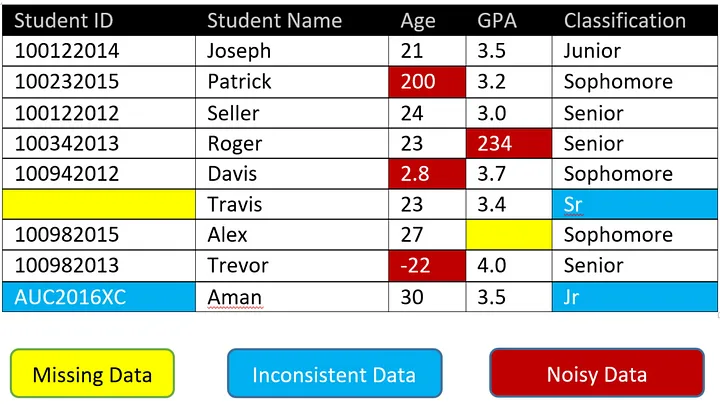


**ตัวอย่าง**

ข้อมูลการวัดค่าสัญญาณชีพของผู้ป่วยคนหนึ่งจากไฟล์ [`biometric-data.csv`](https://raw.githubusercontent.com/trasapong/259201/main/biometric-data.csv) (คลิกเพื่อดาวน์โหลด)

เมื่อดาวน์โหลดไฟล์ได้แล้ว ให้อัพโหลดไฟล์ดังกล่าวขึ้นไปที่ `Files` section ของ Colab Notebook นี้

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/trasapong/259201/main/biometric-data.csv'
df = pd.read_csv(url)

print(df)
print(df.shape)

จากข้อมูลข้างต้น จะเห็นว่ามีความไม่สมบูรณ์ของข้อมูลที่พบ ได้แก่
- **ข้อมูลหาย** : `Date` ในบรรทัดที่ 22, `Calories` ในบรรทัดที่ 18 และ 28
- **รูปแบบข้อมูลไม่ถูกต้อง** : `Date` ในบรรทัดที่ 26
- **ข้อมูลผิด** : `Duration` ในบรรทัดที่ 7
- **ข้อมูลซ้ำซ้อน** : บรรทัดที่ 11 และ 12



### การจัดการข้อมูลที่สูญหาย

`Pandas` ใช้ค่า **`np.nan`** `(NaN)` แสดงถึงข้อมูลที่สูญหายซึ่งจะไม่ถูกนำมาประมวลผล

เราสามารถจัดการกับข้อมูลที่สูญหายได้หลายวิธี ได้แก่





#### Remove rows

- การตัดแถวหรือคอลัมน์ที่พบข้อมูลสูญหายออกไปจาก dataset (อาจทำให้เหลือข้อมูลน้อยเกินไปสำหรับการวิเคราะห์)

- เราสามารถใช้ฟังก์ชัน `.dropna()` ในการลบแถวที่ข้อมูลมีค่า `NaN` ออก โดยผลลัพธ์ที่ได้จะเป็น `DataFrame` อันใหม่

In [ ]:
# สร้าง dataframe ใหม่โดยการลบแถวข้อมูลที่มี NaN จาก dataframe ตั้งต้น
# dataframe ตั้งต้นยังคงมีข้อมูลเหมือนเดิม
df_dropna = df.dropna()
print(df_dropna.shape)
print(df_dropna)

หากต้องการเปลี่ยนแปลง `DataFrame` ตั้งต้นแทนที่จะสร้างอันใหม่ ให้เพิ่ม `inplace=True` ให้กับฟังก์ชันด้วย

In [ ]:
# สร้างสำเนาข้อมูลจากข้อมูลตั้งต้น เพื่อใช้ทดลอง
df_new = df.copy()

# ลบแถวที่มี NaN แล้วบันทึกลงใน df_new เหมือนเดิม
df_new.dropna(inplace = True)
print(df_new.shape)
print(df_new)

#### Replace Missing Values

- การเติมข้อมูลที่หายไปด้วยค่าบางอย่าง เช่น ค่าเฉลี่ย (mean) ของคอลัมน์นั้น

- เราสามารถใช้ฟังก์ชัน `fillna()` ในการแทนที่ค่า `NaN` ทุก item ด้วยค่าที่เราต้องการ

**ตัวอย่าง**

ให้ทำการอ่านไฟล์ข้อมูลใหม่อีกครั้ง

In [ ]:
# สร้างสำเนาข้อมูลจากข้อมูลตั้งต้น เพื่อใช้ทดลอง
df_new = df.copy()

# แทนที่ NaN ทุกตำแหน่งด้วย 0
df_new.fillna(0, inplace = True)
print(df_new)

หากเราต้องการแทนที่ค่า `NaN` ในคอลัมน์ที่เราต้องการเท่านั้น เราสามารถระบุใช้โค้ดในลักษณะ `dataframe['column-name'].fillna()` ได้

In [ ]:
# สร้างสำเนาข้อมูลจากข้อมูลตั้งต้น เพื่อใช้ทดลอง
df_new = df.copy()

# แทนที่ค่า NaN เฉพาะในคอลัมน์ Calories ด้วย 130
df_new['Calories'].fillna(130, inplace=True)
print(df_new)

โดยทั่วไปเรามักจะแทนที่ `NaN` ด้วยค่าทางสถิติที่คำนวณได้จากแต่ละคอลัมน์ ได้แก่

- **ค่าเฉลี่ย** (mean) : ใช้ฟังก์ชัน `.mean()`
- **ค่ามัธยฐาน** (median) : ใช้ฟังก์ชัน `.median()`
- **ค่าฐานนิยม** (mode) : ใช้ฟังก์ชัน `.mode()`

**ค่าฐานนิยมของชุดข้อมูลอาจมีได้หลายค่า** ดังนั้นผลลัพธ์ของ `.mode()` จึงถูกจัดเก็บเป็น `Series`

**ตัวอย่าง**

In [ ]:
# สร้างสำเนาข้อมูลจากข้อมูลตั้งต้น เพื่อใช้ทดลอง
df_new = df.copy()

# x = df['Calories'].mean()         # หาค่า mean ของคอลัมน์ Calories
# x = df['Calories'].median()       # หาค่า mdian ของคอลัมน์ Calories
x = df_new['Calories'].mode()[0]        # หาค่า mode ของคอลัมน์ Calories

df_new['Calories'].fillna(x, inplace = True)
print(df_new)

In [ ]:
# ลองเล่นกับผลลัพธ์ของ .mode()
x = df_new['Calories'].mode()
print(x)
print(x.shape)
print(x[0])

### การแก้ไขรูปแบบข้อมูล

- ข้อมูลที่**รูปแบบ (format)** ไม่ถูกต้องจะทำให้การวิเคราะห์มูลทำได้ยาก
- เราสามารถลบแถวข้อมูลดังกล่าวออกไป หรือปรับแก้รูปแบบข้อมูลทุก ๆ item ในคอลัมน์นั้นให้ถูกต้อง

จากตัวอย่างข้อมูล จะเห็นว่าในคอลัมน์ `Date` มีข้อมูลที่ไม่ถูกต้องในบรรทัดที่ 22 และ 26

เราสามารถเปลี่ยนข้อมูลในคอลัมน์ `Date` ให้อยู่ในรูปแบบ `วันที่(date)` โดยการใช้ฟังก์ชัน `pd.to_datetime()`

**ตัวอย่าง**

In [ ]:
# ทำต่อจาก df_new ก่อนหน้านี้
df_new['Date'] = pd.to_datetime(df_new['Date'])
print(df_new)

จากผลลัพธ์ที่ได้ พบว่า `Date` ในบรรทัดที่ 22 ยังไม่ถูกต้อง

ใน `Pandas` ค่า `NaT (Not a Time)` ถือว่าเป็น `NaN` สำหรับข้อมูลวันที่

เราสามารถแก้ไข `NaT` ด้วยการกำหนดค่าแทนที่ด้วยฟังก์ชัน **`.loc['column-name','row-name]`** หรือ**ลบแถวที่มีข้อมูลดังกล่าว**ออกไปจากข้อมูล

In [ ]:
df_new.loc[22, 'Date'] = pd.to_datetime('2020-12-22')
print(df_new)

### การจัดการข้อมูลที่ไม่ถูกต้อง

- **ข้อมูลที่ไม่ถูกต้อง** คือ ข้อมูลที่มีค่าไม่สอดคล้องกับความเป็นจริง หรือไม่อยู่ในช่วงของข้อมูลตามปกติ
- โดยทั่วไปเราสังเกตุได้จากค่าทางสถิติ เช่น ค่า `minimum-maximum` ในคอลัมน์นั้นควรอยู่ช่วงที่เป็นไปได้

จากตัวอย่างข้อมูล `biometric-data.csv` จะเห็นว่าค่า `Duration` ซึ่งเป็นระยะเวลาในการวัดสัญญาณชีพควรอยู่ในช่วง `45-60` วินาที แต่ค่าในแถวที่ 7

In [ ]:
# จากข้อมูลที่ผ่านการจัดการข้อมูลที่สูญหาย และปรับรูปแบบข้อมูลแล้ว
# แทนค่าข้อมูลใน cell ที่เก็บค่า 450 ด้วย 45
df_new.loc[7,'Duration'] = 45
print(df_new)

ในกรณีที่มีข้อมูลหลายแถวที่ไม่ถูกต้อง เราสามารถใช้ loop ร่วมกับการเช็คเงื่อนไข แล้วจึงใช้ฟังก์ชัน `.drop()` ในการลบแถวเหล่านั้น

**ตัวอย่าง**

In [ ]:
# การลบทุกแถวที่ Duration มีค่า > 60
for row in df_new.index:
  if df_new.loc[row,'Duration'] > 60:
    df_new.drop(row, inplace = True)

### การจัดการข้อมูลซ้ำซ้อน

จากตัวอย่างข้อมูล จะพบว่าข้อมูลในบรรทัดที่ 11 และ 12 มีค่าซ้ำกัน เราสามารถค้นหาข้อมูลที่ซ้ำกันได้ด้วยฟังก์ชัน `.duplicated()`

เราสามารถลบข้อมูลที่ซ้ำกันให้เหลือเพียงรายการที่ไม่ซ้ำกันได้ด้วยฟังก์ชัน `drop_duplicates()`

**ตัวอย่าง**

In [ ]:
print(df_new.duplicated())

In [ ]:
df_new.drop_duplicates(inplace = True)
print(df_new)

## การแปลงข้อมูล (Data Transformation)

การแปลงข้อมูล คือ การปรับแต่งข้อมูล หรือการจัดเรียงข้อมูล เพื่อให้สะดวกต่อการทำความเข้าใจ เช่น

- การเปลี่ยนโครงสร้างข้อมูล (data structure modification)
- การปรับคัดกรองข้อมูล (filtering)
- การเรียงลำดับข้อมูล (sorting)
- การจัดกลุ่มข้อมูล (grouping)
- การรวมข้อมูล (aggregation)



### การสร้างคอลัมน์ใหม่

นอกจากนี้เรายังสามารถสร้างคอลัมน์ใหม่ได้โดยการกำหนดค่าในรูปแบบคล้ายกับการสร้าง `key` ใหม่ให้กับ `dictionary`

```python
dataframe["new-col-name"] = ...
```

โดย `new-col-name` คือชื่อคอลัมน์ที่ต้องการสร้างขึ้นใหม่



**ตัวอย่าง**

ข้อมูล employee จำนวน 12 คน

In [ ]:
import pandas as pd

data = {
    'emp_id' : ['c001', 'c002', 'c003', 'c004', 'c005', 'c006', 'c007', 'c008', 'c009', 'c010', 'c011', 'c012'],
    'name': ['John', 'Paul', 'Jane','George', 'Ringo', 'Mick', 'Keith', 'Charlie', 'Michelle', 'Bill', 'Brian', 'Mary'],
    'age': [38, 26, 38, 38, 26, 47, 26, 34, 32, 38, 46, 40],
    'gender': ['M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'F'],
    'salary': ['100_000.00', '65_000.00', '120_000.00', '80_000.00', '90_000.00',
               '100_000.00','110_000.00','70_000.00','130_000.00','140_000.00',
               '150_000.00','160_000.00'],
    'duration': [3, 7, 11, 3, 15, 6, 15, 5, 13, 14, 4, 13]
      }

# สร้าง DataFrame จาก Dictionary
df = pd.DataFrame(data)

# กำหนดชนิดของข้อมูลให้เหมาะสม
df['emp_id'] = df['emp_id'].astype('string')      # ข้อความ
df['name'] = df['name'].astype('string')          # ข้อความ
df['age'] = df['age'].astype('int32')             # จำนวนเต็ม
df['gender'] = df['gender'].astype('category')    # หมวดหมู่
df['salary'] = df['salary'].astype('float32')     # ทศนิยม
df['duration'] = df['duration'].astype('int64')   # จำนวนเต็ม

# กำหนดให้ใช้คอลัมน์ 'emp_id' เป็น row-index/row-label แทนค่าจำนวนเต็ม 0-11
# ไม่สร้าง dataframe ใหม่
df.set_index('emp_id', inplace = True)

print(df.info())

In [ ]:
print(df)

In [ ]:
# สร้างคอลัมน์ "salary_month"
df['salary_month'] = df['salary'] / 12    # กระจายการ /12 เข้าไปยังทุก ๆ item

print(df)

In [ ]:
# สร้างคอลัมน์ "isSenior" โดยมีค่าเป็น True ถ้าทำงานมานานเกิน 10 ปี
df['isSenior'] = df['duration'] > 10      # กระจายการเปรียบเทียบ >10 เข้าไปทุก ๆ item
print(df)

In [ ]:
# สร้างคอลัมน์ "four" จากค่าคงที่
df['four'] = 4
print(df)

In [ ]:
# สร้างคอลัมน์ "five" จากบางช่วงของคอลัมน์ "duration"
df['five'] = df['salary'][:8]    # ได้ข้อมูลจากแถวที่ [0,8]
print(df)

### การแทรกคอลัมน์

การแทรกคอลัมน์ทำได้โดยการใช้คำสั่ง `.insert(location,"col-name",value)`

- `location` : ค่า `column-index` ที่จะแทรกข้อมูล (0<=location<=len(columns)
- `col-name` : ชื่อคอลัมน์ใหม่
- `value` : ค่าที่ต้องการแทรกให้กับคอลัมน์นี้ (scalar value, Series, array)

In [ ]:
# แทรกคอลัมน์ six ไปเป็น
df.insert(1,"six", 6.0)
print(df)

In [ ]:
# df.insert(len(df.columns),"seven", [10,20,30,40])
df.insert(len(df.columns),"seven", [10,20,30,40,50,60,70,80,90,100,110,120])
print(df)

### การลบคอลัมน์
การลบคอลัมน์ที่ไม่ต้องการทำได้โดยการใช้คำสั่ง

```python
del dataframe["col-name"]
```

**ตัวอย่าง**

In [ ]:
del df['four']
del df['five']
del df['six']

In [ ]:
print('Before delete "seven":')
print(df)

if 'seven' in df.columns:         # ถ้ามีคอลัมน์ชื่อ "six" ให้ลบคอลัมน์นั้น
  del df['seven']

print('\nAfter delete "seven":')
print(df)

}

### การคัดกรองข้อมูล (filtering)

- การคัดกรองข้อมูลหรือที่หลายคนเรียกว่า **"Boolean indexing"**
- ใช้ในการค้นหาเซลล์ข้อมูล หรือ แถวข้อมูลที่สอดคล้องกับเงื่อนไขที่กำหนด

ใช้หลักการเดียวกับ `NumPy` คือ

1. สร้าง **selector** ด้วยการนำ `DataFrame` ไปเปรียบเทียบกับเงื่อนไขที่ต้องการ จะได้ผลลัพธ์เป็น `Series` หรือ `DataFrame` ของค่า `True/False` เช่น

  ```python
  # ค้นหาเซลล์ข้อมูลซึ่งมีค่าเท่ากับ 0
  selector1 = (dataframe == 0)

  # ค้นหาเซลล์ข้อมูลในคอลัมน์ 'col-label' ที่มีค่าน้อยกว่า 10 >> ได้แถวข้อมูลที่เราสนใจ
  selector2 = (dataframe['col-label'] < 10)
  ```

2. นำ selector ที่ได้ไปใช้เป็นค่า `index` ให้กับ `DataFrame` เดียวกัน ดังรูปแบบคือ

  ```python
  # รายการข้อมูลที่มากกว่า 0
  df_cell_morethan_0 = dataframe[selector1]

  # แถวของข้อมูลที่มีค่าในคอลัมน์ 'col-label' น้อยกว่า 10
  df_rows = dataframe[selector2]
  ```

In [ ]:
# selector: แสดงแถวที่มีข้อมูล 'gender' เป็น 'M'
df['gender']=='M'

In [ ]:
# นำค่า selector มาใช้เลือกข้อมูลจาก DataFrame
# ดึงเฉพาะแถวข้อมูลที่ค่า selector เป็น True
rows_male = df[ df['gender']=='M' ]
print(rows_male)
print()

In [ ]:
# selector: แสดงแถวข้อมูลที่คอลัมน์ 'salary' มากกว่า 100k
df['salary'] > 100_000

In [ ]:
# ดึงเฉพาะแถวข้อมูลที่ค่า selector เป็น True ('salary' มากกว่า 100k)
rows_salary_10k = df[  df['salary'] > 100_000 ]

print(rows_salary_10k)
print()

**ตัวอย่าง**

แสดงแถวข้อมูลพนักงานที่มี 'salary'ในช่วง 100k-130k

In [ ]:
# สร้างตัวแปรเพื่อเก็บค่าคอลัมน์ 'salary' (จะได้ไม่ต้องพิมพ์ยาว ๆ)
salary = df['salary']

# วิธีที่ 1 สร้าง selector จากการนำ 2 เงื่อนไขมา AND กันเลย
selector1 = (salary >= 100_000) & (salary <= 130_000 )
print(selector1)
print()

# แสดงจำนวนข้อมูลที่พบในแต่ละกรณี (True vs. False)
print(selector1.value_counts())

In [ ]:
# วิธีที่ 2: สร้าง selector จากแต่ละเงื่อนไข
selector_M100k = (salary >= 100_000)
selector_L130k = (salary <= 130_000)

print(selector_M100k.value_counts())
print(selector_L130k.value_counts())

# นำ selector ทั้งสองกรณีมา AND กัน
selector2 = selector_M100k & selector_L130k
print(selector2.value_counts())

In [ ]:
# นำ selector ที่ได้มาใช้เลือก row ที่ต้องการจาก DataFrame
print(df[ selector1 ])
print(df[ selector2 ])

### การเรียงลำดับข้อมูล (sorting)

ในการเรียงลำดับข้อมูลจะอาศัยฟังก์ชัน ได้แก่

- **`.sort_index()`** : เรียงลำดับด้วยชื่อคอลัมน์ `col-index` และชื่อแถว `row-index`
- **`.sort_value()`** : เรียงลำดับด้วยข้อมูลในคอลัมน์ที่ต้องการ

ผลลัพธ์จะได้เป็น `DataFrame` ใหม่ ที่มีการเรียงลำดับข้อมูลแล้ว โดยเราสามารถกำหนดค่า `ascending=False` หากต้องการเรียงค่าจาก `มากไปหาน้อย`

**ตัวอย่าง**

In [ ]:
print(df)

In [ ]:
# เรียงลำดับด้วย row-label จากมากไปหาน้อย (เรียงลำดับแบบข้อความ)
df_sort = df.sort_index(axis=0, ascending=False)
print(df_sort)

In [ ]:
# เรียงลำดับด้วย col-index จากน้อยไปหามาก (เรียงลำดับตามชื่อคอลัมน์)
df_sort = df.sort_index(axis=1, ascending=True)
print(df_sort)

In [ ]:
# เรียงลำดับข้อมูลด้วยคอลัมน์ 'age' จากน้อยไปหามาก (ascending=True)
df_sort = df.sort_values(by='age')
print(df_sort)

In [ ]:
# เรียงลำดับข้อมูลด้วยคอลัมน์ 'salary_month' จากมากไปหาน้อย (ascending=False)
df_sort = df.sort_values(by='salary_month', ascending=False)
print(df_sort)

### การจัดกลุ่มข้อมูล (grouping)

- การจัดกลุ่มข้อมูลจะอาศัยฟังก์ชัน `.groupby()`
- เรานำกลุ่มข้อมูลที่ได้ไปประมวลผล เพื่อหาผลลัพธ์บางอย่างที่ต้องการต่อได้

**ตัวอย่าง**

จากข้อมูล employee ก่อนหน้านี้

In [ ]:
print(df)

จัดกลุ่มด้วย `gender` ซึ่งทำให้มีกลุ่มย่อยคือ `Female (F)` และ `Male (M)` แล้วแสดงผลรวม `.sum()` ของข้อมูลแต่ละกลุ่ม ในคอลัมน์ต่าง ๆ

In [ ]:
df.groupby('gender').sum()

หากสนใจผลรวมเฉพาะบางคอลัมน์ สามารถอ้างอิงด้วย **`['col-label']`** ต่อท้าย เช่น

In [ ]:
# ผลรวมของเงินเดือนรายปี แบ่งกลุ่มตามเพศ
print( df.groupby('gender')['salary'].sum() )
print()

# ค่าเฉลี่ยของอายุพนักงาน แบ่งกลุ่มตามเพศ
print( df.groupby('gender')['age'].mean() )
print()

# ค่าเฉลี่ยของอายุพนักงานเพศหญิง
print( f"Average age of Female : {df.groupby('gender')['age'].mean()[0]}")

In [ ]:
# ค่าเฉลี่ยของเงินเดือนรายปี แบ่งกลุ่มตามความอาวุโสในบริษัท
df.groupby('isSenior')['salary'].mean()

In [ ]:
# ค่าเฉลี่ยของอายุงานในบริษัท แบ่งกลุ่มตามความอาวุโสในบริษัท
df.groupby('isSenior')['duration'].mean()

## การนำออกข้อมูล (Data Exporting)

โดยข้อมูลแต่ละประเภทจะมีฟังก์ชันสำหรับการ `write` ข้อมูลเป็นของตนเอง เช่น `.to_csv()` `.to_json()` `.to_excel()` `.to_stata()` `.to_sql()` เป็นต้น



### การบันทึกข้อมูลที่ได้เป็นไฟล์ CSV

อาศัยฟังก์ชัน **`.to_csv()`** โดยระบุ
- **`path`** : ไดเรกทอรีและชื่อของไฟล์ที่ต้องการบันทึก
- **`index`** : ต้องการบันทึกคอลัมน์แรกที่ใช้เป็น `row index` ลงในไฟล์ด้วยหรือไม่ เช่น ถ้าไม่ต้องการให้ระบุค่า `index=False`
- **`sep`** : ต้องการใช้อักขระใดในการแบ่งแยกคอลัมน์ของข้อมูล โดยถ้าไม่ระบุฟังก์ชันจะใช้ `comma` เป็นตัวแบ่ง แต่อาจระบุเป็นค่าอื่นได้ เช่น ถ้าต้องการใช้ `tab` ให้ระบุเป็นค่า `sep="\t"`



**ตัวอย่าง**

จากข้อมูล employee ที่คุ้นเคย

In [ ]:
import pandas as pd

data = {
    'emp_id' : ['c001', 'c002', 'c003', 'c004', 'c005', 'c006', 'c007', 'c008', 'c009', 'c010', 'c011', 'c012'],
    'name': ['John', 'Paul', 'Jane','George', 'Ringo', 'Mick', 'Keith', 'Charlie', 'Michelle', 'Bill', 'Brian', 'Mary'],
    'age': [38, 26, 38, 38, 26, 47, 26, 34, 32, 38, 46, 40],
    'gender': ['M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'F'],
    'salary': ['100_000.00', '65_000.00', '120_000.00', '80_000.00', '90_000.00',
               '100_000.00','110_000.00','70_000.00','130_000.00','140_000.00',
               '150_000.00','160_000.00'],
    'duration': [3, 7, 11, 3, 15, 6, 15, 5, 13, 14, 4, 13]
      }

# Create a Pandas dataframe from the dictionary
df = pd.DataFrame(data)

df['isSenior'] = df['duration']>10

# กำหนดชนิดของข้อมูลให้เหมาะสม
df['emp_id'] = df['emp_id'].astype('string')      # ข้อความ
df['name'] = df['name'].astype('string')          # ข้อความ
df['age'] = df['age'].astype('int32')             # จำนวนเต็ม
df['gender'] = df['gender'].astype('category')    # หมวดหมู่
df['salary'] = df['salary'].astype('float32')     # ทศนิยม
df['duration'] = df['duration'].astype('int64')   # จำนวนเต็ม

# แสดงรายละเอียดคอลัมน์
print(df.info())

}

**หมายเหตุ** : `DataFrame` นี้ไม่ได้มีการกำหนดค่า `index` ใหม่ แต่ให้ใช้ค่าเป็นรายการตัวเลข `0,1,2,...`

In [ ]:
print(df)

In [ ]:
# บันทึกไฟล์พร้อม index column จะบันทึก index ที่เป็นรายการตัวเลขลงในไฟล์ด้วย
df.to_csv('employee-index.csv')

In [ ]:
# บันทึกไฟล์โดยไม่สนใจ index column
df.to_csv('employee-noindex.csv',index=False)

In [ ]:
# บันทึกไฟล์โดยไม่สนใจ index column และใช้ tab ในการแบ่งคอลัมน์แทนการใช้ comma
# ได้ไฟล์ TSV (Tab Separated Value) ที่ใช้การ tab เพื่อแจกข้อมูลต่างคอลัมน์
df.to_csv('employee-tab.tsv',index=False,sep='\t')

### การบันทึกข้อมูลที่ได้เป็นไฟล์ Excel

เราสามารถบันทึกข้อมูลเป็น Excel spreadsheet ได้โดยใช้ฟังก์ชัน **`.to_excel()`** บันทึกข้อมูลเป็นไฟล์ `.xlsx`

เราสามารถกำหนดชื่อของ `sheet` ได้ด้วยการกำหนดค่า `sheet_name="new_sheet_name"`


**ตัวอย่าง**

สร้างไฟล์ `Spreadsheet` ที่เก็บ **ข้อมูลพนักงานที่อายุเกิน 35 ซึ่งมีอายุงานในบริษัทมากที่สุด 5 อันดับแรก**

In [ ]:
# คัดกรองพนักงานที่ "อายุมากกว่า 35 ปี"
df_over35 = df[ df['age']>35 ]
df_over35

In [ ]:
# เรียงลำดับข้อมูลที่ได้จากพนักงานที่ "อายุมากไปหาน้อย"
df_over35_sort = df_over35.sort_values(by='age',ascending=False)
df_over35_sort

In [ ]:
# เลือกข้อมูลพนักงานที่ "อายุมากที่สุด 5 อันดับแรก"
df_over35_top5 = df_over35_sort[0:5]
df_over35_top5

In [ ]:
# เรียงลำดับข้อมูลพนักงานจาก "อายุงานในบริษัทจากมากไปหาน้อย"
df_output = df_over35_top5.sort_values(by='duration',ascending=False)
df_output

In [ ]:
# บันทึกข้อมูลที่ได้ลงเป็น spreadsheet ไฟล์ โดยไม่เก็บคอลัมน์ที่ให้เป็น row-index
df_output.to_excel('employee-top5duration-over35.xlsx',sheet_name='top5 duration over 35 yrs',index=False)

## การนำเสนอข้อมูลเชิงภาพ (Data Visualization)



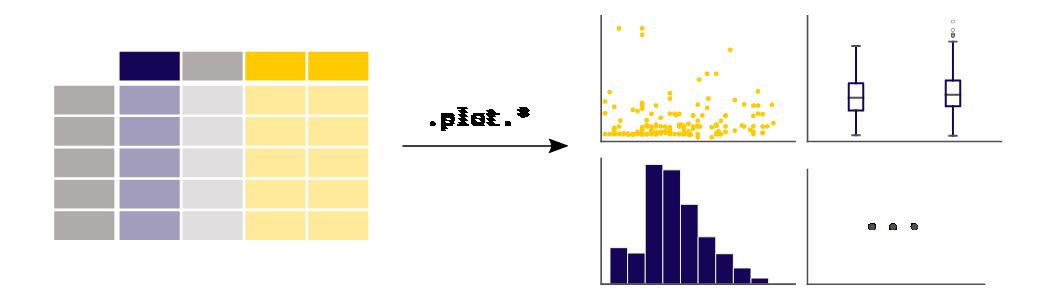


ความสะดวกด้านนึงของการใช้ `Pandas` คือ การที่ `Series` และ `DataFrame` มาพร้อมกับฟังก์ชัน **`.plot()`** สำหรับการสร้าง `plot` ในรูปแบบต่าง ๆ โดยเราสามารถเลือกชนิดได้ด้วยการกำหนดค่าให้ `kind=...` เวลาเรียกใช้งานฟังก์ชัน เช่น

- Line plots : `default`
- Scatter plots : `kind='scatter'`
- Bar plots : `kind='bar'`, `kind='barh'`
- Histograms : `kind='hist'`
- Box plots : `kind='box'`
- Area plots : `kind=area'`
- Pie charts : `kind=pie`

หากรันฟังก์ชันเหล่านี้ใน `Jupyter notebook` จะแสดง `plot` ขึ้นทันที แต่ถ้านำไปรันในวิธีการอื่นอาจต้องเรียกฟังก์ชัน `.show()` ตามท้ายเหมือนกับการใช้งาน `matplotlib.pyplot`

ดูข้อมูลเพิ่มเติมได้ [ที่นี่](https://pandas.pydata.org/docs/user_guide/visualization.html#)



**ตัวอย่าง**

ข้อมูลการใช้จ่ายในระยะเวลา 15 วัน

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
    {
        "day" : pd.Series(np.arange(1,16)),
        "food": pd.Series([100,150,80,200,70,390,50,50,180,70,130,50,40,65,40]),
        "transport": pd.Series([100,120,60,0,30,150,200,120,100,60,45,30,0,0,20]),
        "shopping": pd.Series([430,0,0,100,0,0,200,120,350,0,0,0,100,0,35]),
        "others": pd.Series([0,25,40,100,120,100,80,0,20,10,200,10,40,250,50]),
    }
)

df.set_index('day', inplace=True)
print(df)
print()
print(df.info())

In [ ]:
# ค่าใช้จ่ายรวมสำหรับแต่ละหมวด
print(df.sum(axis=0))

In [ ]:
# ค่าใช้จ่ายรวมสำหรับแต่ละวัน
print(df.sum(axis=1))

In [ ]:
# สร้างคอลัมน์ daily_expense ให้มีค่าเท่ากับผลรวมค่าใช้จ่ายในแต่ละวัน
df['daily_expense'] = df.sum(axis=1)
print(df)
print(df.info())

### Line plots

In [ ]:
df.plot()

In [ ]:
df[['food','shopping']].plot(xlabel='day',ylabel='expense (baht)', title='Spending Data')

In [ ]:
# กำหนดรูปแบบ color, marker, line style และ grid
hticks = range(0,16)
vticks = range(0,500,50)
df[['food','shopping']].plot(style=['m^-','g.-'], xticks=hticks, yticks=vticks, grid=True)

### Scatter plots

In [ ]:
# ใช้ food เป็น x-asis และ shopping เป็น y-axis
df.plot(kind='scatter', x='food', y='shopping')

In [ ]:
# เพิ่มข้อมูล transport เป็นค่าสีในการวาดจุด (ดูค่าได้จาก colorbar)
df.plot(kind='scatter', x='food', y='shopping', c='transport', colormap='hot')

In [ ]:
# เพิ่มข้อมูล other เป็นขนาดของจุด
df.plot(kind='scatter', x='food', y='shopping', s='others', c='transport', colormap='hot')

### Bar plots

In [ ]:
df['daily_expense'].plot(kind='bar')

In [ ]:
df[['food','shopping']].plot(kind='bar')

In [ ]:
# นำแท่งกราฟของข้อมูล food, shopping, transport ในวันเดียวกันมาต่อกัน
df[['food','shopping','transport']].plot(kind='bar',stacked=True)

In [ ]:
# Horizontal Bar plot
df[['food','shopping','transport']].plot(kind='barh',stacked=True)

### Histogram plots

In [ ]:
# วาดแท่งกราฟแสดงความถี่ของข้อมูลแต่ละ category ทับในตำแหน่งเดียวกัน
df[['food','shopping','transport']].plot(kind='hist')

In [ ]:
# กำหนดค่า alpha เพื่อให้แทงกราฟมีความโปร่งแสง 50%
df[['food','shopping','transport']].plot(kind='hist',alpha=0.5)

In [ ]:
# ปรับจำนวนช่วงของข้อมูล (bin) ให้มีค่าเป็น 25 ช่วง
df[['food','shopping','transport']].plot(kind='hist',alpha=0.5, bins=25)

In [ ]:
# แสดงกราฟแท่งความถี่ต่อกัน
df[['food','shopping','transport']].plot(kind='hist',stacked=True, bins=25)

### Box plots

แสดงค่าทางสถิติหลายอย่างไปพร้อม ๆ กัน ทำให้เห็นภาพรวมข้อมูลมากกว่า plot แบบอื่น ๆ



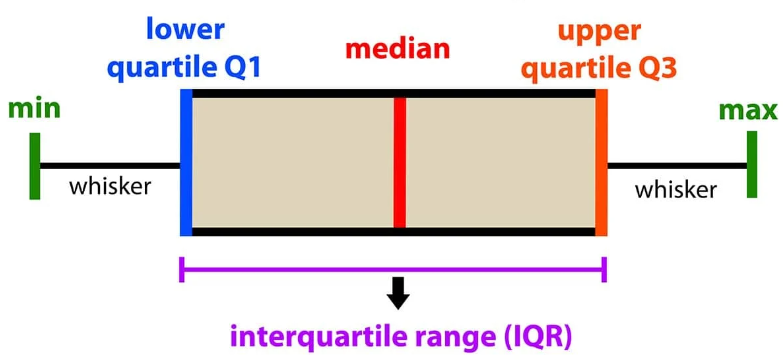

In [ ]:
df[['food','shopping','transport','others']].plot(kind='box')

In [ ]:
# กำหนดค่าสีให้กับส่วนประกอบต่าง ๆ
c = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}

# กำหนดสีและรูปแบบให้กับ outliner
df[['food','shopping','transport','others']].plot(kind='box', color=c, sym="r+")

In [ ]:
# Horizontal box plot (vertical=False)
df[['food','shopping','transport','others']].plot(kind='box', vert=False)

### Area plots

In [ ]:
# plot เชิงพื้นที่แบบซ้อนกัน (stacked=True)
df[['food','shopping','transport','others']].plot(kind='area')

In [ ]:
# plot แบบไม่ซ้อนกัน
df[['food','shopping','transport','others']].plot(kind='area', stacked=False)

### Pie plots

In [ ]:
# กราฟวงกลม แสดงรายจ่ายรวมแต่ละวัน
df.sum(axis=1).plot(kind='pie', title='Spending by day')

In [ ]:
# กราฟวงกลม แสดงรายจ่ายรวม 15 วันสำหรับแต่ละหมวดค่าใช้จ่าย แสดง legend
df.sum(axis=0).plot(kind='pie', title='Spending by category', legend=True)

In [ ]:
# กราฟวงกลม แสดงรายจ่ายรวม 15 วันสำหรับแต่ละหมวดค่าใช้จ่าย แสดงสัดส่วน %
df.sum(axis=0).plot(kind='pie', title='Spending by category', autopct="%.2f%%")